## Applications of Linear Transformations

# Computer graphics

Computer graphics essentially consist of a large number of basic geometric shapes such as triangles or quadrilaterals, defined by their vertexes (corners).  The ability to manipulate these shapes efficiently is a fundamental necessity in the field of computer graphics.  Linear transformations can be used to generate complex shapes from basic shapes through effects such as shearing and reflection, and can also be used to rotate and translate shapes in order to create a sequence of images needed for an animated scene.

The software responsible for rendering three-dimensional scenes in modern video games must process the coordinates of millions of vertexes in each frame of animation.  Typical hardware used for running the software will be able to generate around 60 frames per second.  In addition to the placement of vertexes in a scene, there are other computations required, such as those to provide color and shading, and then to project the three-dimensional scene onto the two-dimensional screen.  In this context, the efficiency of the algorithms, software, and hardware all play a major role in the quality of the end result.  

The use of matrix multiplication to manipulate coordinates for computer graphics has two primary advantages.  Matrix representations can be used to merge multiple transformations together into a single transformation.  For example, instead of applying a rotation followed by a scaling transformation, the two operations can easily be merged into a single operation by multiplying the associated matrices as we did earlier.  The other advantage to organizing the calculations into matrix multiplications is that dedicated hardware (graphics processing units) is designed specifically to handle these calculations in large numbers.

The construction of matrices to carry out rotations, reflections, and shears, has already been demonstrated in discussion session.  Here we show how to use matrix multiplication to carry out a translation, which is not a linear transformation.  

#### Translation

A **translation** is a transformation that moves all points an equal amount in the same direction.  Shown below is an example where all points are shifted (translated) three units to the right, and one unit up by a transformation $T:\mathbb{R}^2 \to \mathbb{R}^2$.  In the plot, we show several points which define a shape, and their corresponding images under the translation.  

In [10]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

coords = np.array([[0,0],[0,3],[1,3],[1,1],[2,1],[2,0],[0,0]])

coords = coords.transpose()

x = coords[0,:]

y = coords[1,:]

## Compute translation by adding 3 to x coordinates and 1 to y coordinates
x_translated =  np.copy(x)
y_translated =  np.copy(y)

for i in range(x.shape[0]):
    x_translated[i] += 4
    y_translated[i] += 1

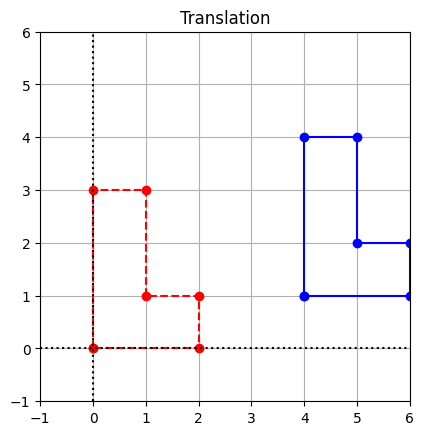

In [11]:
# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation");

Translation of coordinates is useful in computer graphics, but it is not a linear transformation.  In order to see why, we write a formula for the image of a vector $X$, and then verify that $T(X+Y) \neq T(X)+T(Y)$ for arbitrary vectors $X$ and $Y$.

$$
\begin{equation}
T(X) = X + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$


$$
\begin{equation}
T(X+Y) = (X + Y) + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$

$$
\begin{equation}
T(X) + T(Y) = X + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right] + Y + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
= (X + Y) + \left[ \begin{array}{r} 6 \\ 2 \end{array} \right]
\end{equation}
$$

The fact that $T$ is not linear implies that this transformation cannot be represented as a matrix multiplication in its current state.

Since the use of translations are necessary, a standard method has been developed to incorporate matrix multiplication and the associated advantages.  The method requires that we view $\mathbb{R}^2$ as a plane within $\mathbb{R}^3$.  We can then construct a linear transformation $L:\mathbb{R}^3\to\mathbb{R}^3$ which will have the *effect of the translation* within that plane.  We demonstrate the details for the transformation defined above.  

First, we associate the coordinates $(x_1,x_2)$ of a point in $\mathbb{R}^2$ with the coordinates $(x_1,x_2,1)$ of a point in $\mathbb{R}^3$ in the plane $x_3=1$.  These new coordinates are known as *homogeneous coordinates*.  We can then create a linear transformation $L:\mathbb{R}^3\to\mathbb{R}^3$ that represents a shear that is parallel to the $x_1x_2$-plane, and in the direction of the desired translation.  The effect of $L$ on points in the plane $x_3=1$ is a translation within the $x_3=1$ plane.  We define $L(X)=AX$, where $A$ is the following matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rrr} 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{array} \right]
\end{equation}
$$

Recall that the columns of $A$ are the images of the standard basis vectors $\{E_1, E_2, E_3\}$.  In this case $E_1$ and $E_2$ are unchanged, and $E_3$ is sheared in the desired direction.  We observe that $L$ has the intended effect.


$$
\begin{equation}
L(X) = AX = \left[ \begin{array}{rrr} 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{array} \right]
\left[ \begin{array}{r} x_1 \\ x_2 \\ 1 \end{array} \right] = 
\left[ \begin{array}{c} x_1+3 \\ x_2+1 \\ 1 \end{array} \right]
\end{equation}
$$

Finally, we associate with $L(X)$ the point in $\mathbb{R}^2$ that has coordinates $(x_1+3, x_2+1)$.

Let's have a look at the revised calculation with NumPy, that now makes use of the matrix multiplication.

[[0. 0. 1. 1. 2. 2. 0.]
 [0. 3. 3. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]]


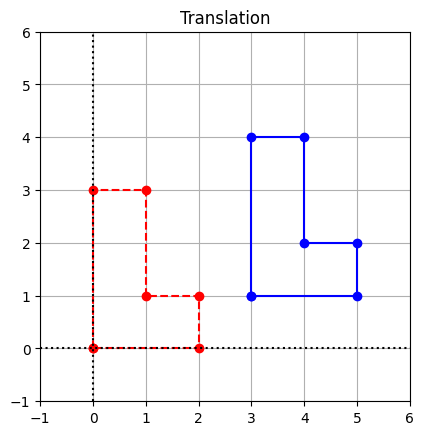

In [12]:
# Form a matrix of coordinates with rows x, y, 1
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))
print(coords);
# Define the matrix for the transfomation L
A = np.array([[1,0,3],[0,1,1],[0,0,1]])

## Compute translation by matrix multiplication
coords_translated = A@coords

## Slice off the first and second rows.  These are the coords of the translated points
x_translated = coords_translated[0,:]
y_translated = coords_translated[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation");

If we look closely at the computation, we realize that this way of computing the coordinates of the translated shape actually requires *more operations* than the first attempt where we stepped through the array and manipulated the coordinates directly.  The important point to remember however is that the ability to represent the translation as a matrix multiplication means that we can merge it with another operation, such as rotation, in order to carry out both operations by multiplying by a single matrix.

Translations of shapes in three dimensions can be done in a similar way by associating each set of coordinate $(x_1, x_2, x_3)$ in $\mathbb{R}^3$ with the point $(x_1, x_2, x_3, 1)$ in $\mathbb{R}^4$.

#### Exercises

**Exercise 1:** 

$(a)$ Find a single matrix that represents a transformation that has the effect of a reflection about the line $y=x$ followed by a shift four units to the right. 

In [13]:
## Code solution here.
A = np.array([[0,1,4],[1,0,0],[0,0,1]])
print(A)

[[0 1 4]
 [1 0 0]
 [0 0 1]]


$(b)$ Apply the transformation to the shape defined by $\texttt{coords}$ and plot the results.

[[0. 0. 1. 1. 2. 2. 0.]
 [0. 3. 3. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]]


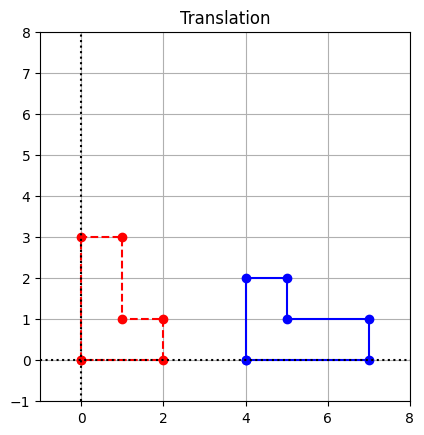

In [14]:
## Code solution here.
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))
print(coords);
# Define the matrix for the transfomation L
A = np.array([[0,1,4],[1,0,0],[0,0,1]])

## Compute translation by matrix multiplication
coords_translated = A@coords

## Slice off the first and second rows.  These are the coords of the translated points
x_translated = coords_translated[0,:]
y_translated = coords_translated[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,8,-1,8])
ax.set_aspect('equal')
ax.set_title("Translation");


**Exercise 2:** 

$(a)$ Find a single matrix that represents a rotation of $180^\circ$ about the point $(2，3)$.  (*Hint:  Make use of a translation to bring the center of rotation to $(0,0)$*.)

In [15]:
## Code solution here.
A = np.array([[-1,0,4],[0,-1,6],[0,0,1]])
print(A)

[[-1  0  4]
 [ 0 -1  6]
 [ 0  0  1]]


$(b)$ Apply the transformation to the shape defined by $\texttt{coords}$ and plot the results.

[[0. 0. 1. 1. 2. 2. 0.]
 [0. 3. 3. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]]


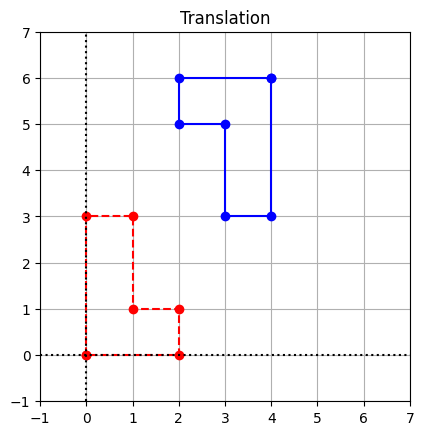

In [16]:
## Code solution here.
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))
print(coords);
# Define the matrix for the transfomation L
A = np.array([[-1,0,4],[0,-1,6],[0,0,1]])

## Compute translation by matrix multiplication
coords_translated = A@coords

## Slice off the first and second rows.  These are the coords of the translated points
x_translated = coords_translated[0,:]
y_translated = coords_translated[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,7,-1,7])
ax.set_aspect('equal')
ax.set_title("Translation");

**Exercise 3:** 

$(a)$ Find a matrix that represents clockwise rotation of $180^\circ$ about the point $(-1,1)$ followed by a shift $2$ units up. Remember to choose the suitable range of x-axis and y-axis accordingly. 


In [17]:
## Code solution here.
A = np.array([[-1,0,-2],[0,-1,4],[0,0,1]])
print(A)

[[-1  0 -2]
 [ 0 -1  4]
 [ 0  0  1]]


$(b)$  Apply the transformation to the shape defined by $\texttt{coords}$ and plot the results.

[[0. 0. 1. 1. 2. 2. 0.]
 [0. 3. 3. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]]


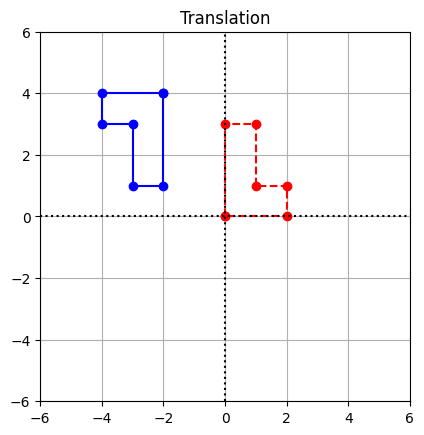

In [18]:
## Code solution here.
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))
print(coords);
# Define the matrix for the transfomation L
A = np.array([[-1,0,-2],[0,-1,4],[0,0,1]])

## Compute translation by matrix multiplication
coords_translated = A@coords

## Slice off the first and second rows.  These are the coords of the translated points
x_translated = coords_translated[0,:]
y_translated = coords_translated[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-6,6,-6,6])
ax.set_aspect('equal')
ax.set_title("Translation");